In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
package_price = pd.read_csv("data/mkt_prices_packaging.csv", sep = ';') #packaging material price.
supply_price = pd.read_csv("data/mkt_prices_supplies.csv", sep = ';') #price of supplies
loading = pd.read_csv("data/quantity_loading.csv", sep = ';') #Q at the loading point
distribution = pd.read_csv("data/quantity_distribution.csv", sep = ';') #Q at the distribution point
weather = pd.read_csv("data/weather.csv", sep = ';')#Weather in distribution point

## 1. Are the market prices for the packaging materials explaining the diversion of humanitarian supplies?

### 1) Data quality check & Preprocessing
Before working with data, we need to check if the data has any problems (missing points etc)

#### a. Basic check

In [4]:
def data_quality_check(data):
    print(len(data))
    print(data.dtypes)
    print(data.isna().sum())

total_data = {
    "package_price": package_price,
    "supply_price": supply_price,
    "distribution": distribution,
    "loading": loading,
    "weather": weather}
for name, data in total_data.items():
    print(f"================{name}===================")
    data_quality_check(data)
    

================package_price===================
62
date        object
px_matA    float64
px_matB    float64
dtype: object
date       0
px_matA    0
px_matB    0
dtype: int64
================supply_price===================
62
date       object
px_hsA    float64
px_hsB    float64
px_hsC    float64
dtype: object
date      0
px_hsA    0
px_hsB    0
px_hsC    0
dtype: int64
================distribution===================
62
date       object
q_distA     int64
q_distB     int64
q_distC     int64
dtype: object
date       0
q_distA    0
q_distB    0
q_distC    0
dtype: int64
================loading===================
62
date       object
q_loadA     int64
q_loadB     int64
q_loadC     int64
dtype: object
date       0
q_loadA    0
q_loadB    0
q_loadC    0
dtype: int64
================weather===================
62
date         object
temp        float64
rainfall    float64
dtype: object
date        0
temp        0
rainfall    0
dtype: int64


[Result] 
- All the length of the data is same.
- Date column should be converted to date object
- There is no obvious missing values but we need to be aware that there can be errors in data

#### b. Colum format change

In [5]:
package_price['date'] = pd.to_datetime(package_price['date'], format='%m/%d/%Y')
package_price.head()

,date,px_matA,px_matB
0,2023-12-01,4.32,5.71
1,2023-12-02,4.32,5.71
2,2023-12-03,4.32,5.71
3,2023-12-04,4.32,5.71
4,2023-12-05,4.32,5.71


In [6]:
supply_price['date'] = pd.to_datetime(supply_price['date'], format='%m/%d/%Y')
supply_price.head()

,date,px_hsA,px_hsB,px_hsC
0,2023-12-01,1.0,0.24,0.82
1,2023-12-02,1.0,0.24,0.82
2,2023-12-03,1.0,0.24,0.82
3,2023-12-04,1.0,0.24,0.82
4,2023-12-05,1.0,0.24,0.82


In [7]:
distribution['date'] = pd.to_datetime(distribution['date'], format='%m/%d/%Y')
distribution.head(10)

,date,q_distA,q_distB,q_distC
0,2023-12-01,246,1048,1038
1,2023-12-02,212,1052,1054
2,2023-12-03,0,0,0
3,2023-12-04,236,1016,1096
4,2023-12-05,245,1060,1042
5,2023-12-07,206,1026,1067
6,2023-12-06,247,1042,1090
7,2023-12-08,0,0,0
8,2023-12-09,244,1002,1020
9,2023-12-10,213,1016,1070


In [8]:
loading['date'] = pd.to_datetime(loading['date'], format='%m/%d/%Y')
loading.head(10)

,date,q_loadA,q_loadB,q_loadC
0,2023-12-01,295,1108,1083
1,2023-12-02,270,1074,1144
2,2023-12-03,0,0,0
3,2023-12-04,264,1150,1142
4,2023-12-05,256,1112,1129
5,2023-12-06,291,1058,1092
6,2023-12-07,291,1122,1147
7,2023-12-08,0,0,0
8,2023-12-09,254,1142,1077
9,2023-12-10,300,1130,1097


In [9]:
#Fix error where date was "12/10/202" into '12/10/2023'
weather.loc[weather['date']=='12/10/202', 'date']='12/10/2023'
weather['date'] = pd.to_datetime(weather['date'], format='%m/%d/%Y')
weather.head(10)

,date,temp,rainfall
0,2023-12-01,25.2,7.44
1,2023-12-02,26.2,0.50
2,2023-12-03,26.9,7.99
3,2023-12-04,26.8,8.19
4,2023-12-05,26.3,0.52
5,2023-12-06,25.1,7.26
6,2023-12-07,25.5,7.31
7,2023-12-08,26.9,7.76
8,2023-12-09,25.4,7.73
9,2023-12-10,26.0,7.42


#### c. Plotting to see outlier/potential missing value

[]

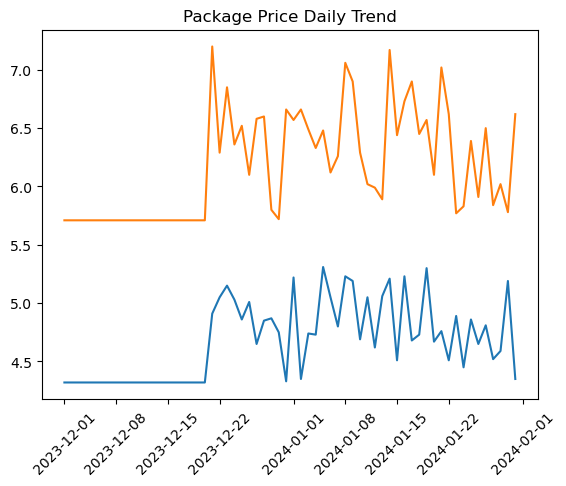

In [10]:
plt.figure()
plt.title("Package Price Daily Trend")

plt.plot(package_price['date'],package_price['px_matA'] )
plt.plot(package_price['date'],package_price['px_matB'] )
plt.xticks(rotation=45)
plt.plot()

[]

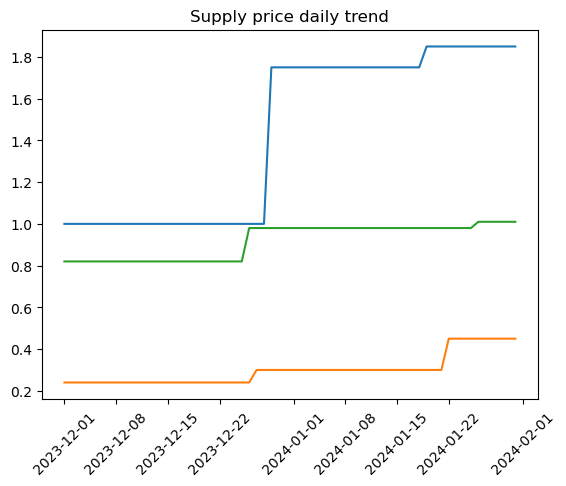

In [11]:
plt.figure()
plt.title("Supply price daily trend")
plt.plot(supply_price['date'],supply_price['px_hsA'] )
plt.plot(supply_price['date'],supply_price['px_hsB'] )
plt.plot(supply_price['date'],supply_price['px_hsC'] )

plt.xticks(rotation=45)
plt.plot()



[]

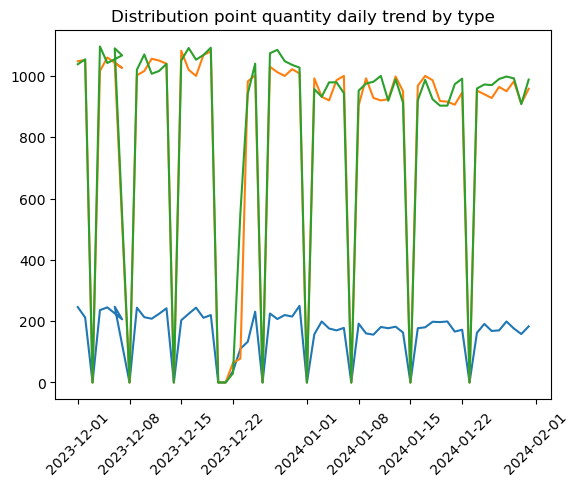

In [17]:

plt.figure()
plt.title("Distribution point quantity daily trend by type")
plt.plot(distribution['date'],distribution['q_distA'] )
plt.plot(distribution['date'],distribution['q_distB'] )
plt.plot(distribution['date'],distribution['q_distC'] )

plt.xticks(rotation=45)
plt.plot()

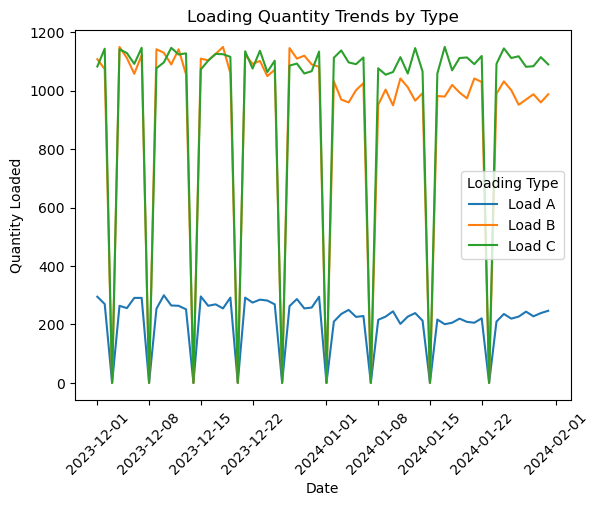

In [82]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Loading Quantity Trends by Type")

plt.plot(loading['date'], loading['q_loadA'], label='Load A')
plt.plot(loading['date'], loading['q_loadB'], label='Load B')
plt.plot(loading['date'], loading['q_loadC'], label='Load C')

plt.xlabel("Date")
plt.ylabel("Quantity Loaded")

plt.xticks(rotation=45)

plt.legend(title='Loading Type')

plt.show()

[]

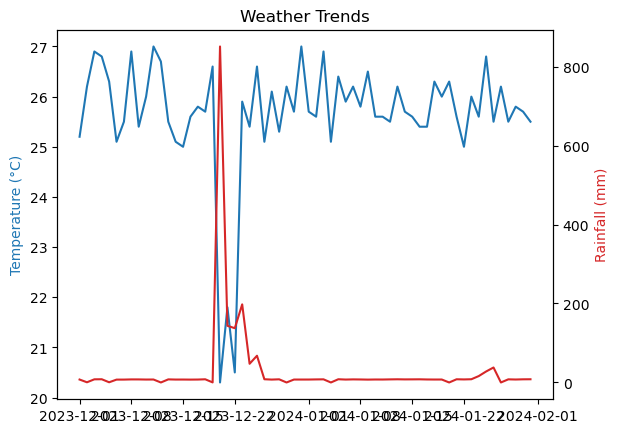

In [83]:

plt.figure()
plt.title("Weather Trends")
plt.plot(weather['date'],weather['temp'], label = 'temp')
plt.ylabel('Temperature (°C)', color='tab:blue')

ax2 = plt.gca().twinx()
ax2.plot(weather['date'], weather['rainfall'], label='Rainfall', color='tab:red')
ax2.set_ylabel('Rainfall (mm)', color='tab:red')

plt.xticks(rotation=45)
plt.plot()

### 2) Problem clarification
- Defore diving deep, we first need to check if the diversion of humanitarian supplies actaully exists
- Also, we need to clarify when and on which product the diversion of supplies happened

Outcome

- Method : 
    + If we subtract q_distA,B,C from q_loadA,B,C we can find the amount of diversion. 
    + Used moving average to see the trend and adjust for times in moving supplies
- Result : In the graph, we can say that supply type A is showing a notable increament pattern in diversion

    - There was a huge spike in diversion in all three types of supplies
        + Especially, supply A and B showed the greatest spike, around four times higher than its previous diversion
    - Recent increase of diversion is most clear in the supply C, which shows gradual increase from start of 2024
        + After the shock, the diversion in supply A and B was stablized. However, supply C showed another jump right after the shock and is showing gradual increase.
    - For type A, it is hard to clearly decide whether there was an increase
    - For type B, there was great increase in variance in diversion, but not a notable increase in diversion trend


In [24]:
#First, we need to define the diversion of humanitarian supplies
#In the given context, "Diversion of supplies" can be defined as the difference of humanitarian supplies
#between loading warehouse and distribution point (Load - Dist)

#Merge the loading dataframe and distribution dataframe
load_dist=pd.merge(loading, distribution,left_on = 'date', right_on = 'date')
load_dist.head()
#Subtract each columns with corresponding columns 
load_dist['diversion_A'] = load_dist['q_loadA']-load_dist['q_distA']
load_dist['diversion_B'] = load_dist['q_loadB']-load_dist['q_distB']
load_dist['diversion_C'] = load_dist['q_loadC']-load_dist['q_distC']



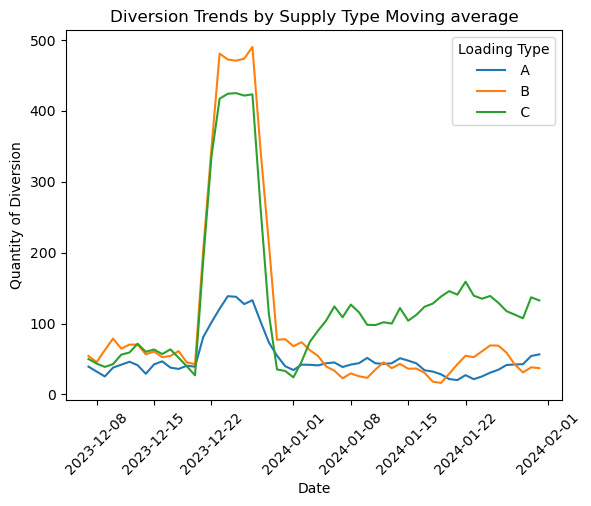

In [30]:
#To find if there was any trend, we can calculate the moving average
load_dist['diversion_A_Movingavg'] = load_dist['diversion_A'].rolling(window=7).mean()
load_dist['diversion_B_Movingavg'] = load_dist['diversion_B'].rolling(window=7).mean()
load_dist['diversion_C_Movingavg'] = load_dist['diversion_C'].rolling(window=7).mean()
import matplotlib.pyplot as plt

plt.figure()
plt.title("Diversion Trends by Supply Type Moving average")

plt.plot(load_dist['date'], load_dist['diversion_A_Movingavg'], label=' A')
plt.plot(load_dist['date'], load_dist['diversion_B_Movingavg'], label=' B')
plt.plot(load_dist['date'], load_dist['diversion_C_Movingavg'], label=' C')

plt.xlabel("Date")
plt.ylabel("Quantity of Diversion")

plt.xticks(rotation=45)
plt.legend(title='Loading Type')

plt.show()

### 3) Is it related to market price of the packaging material?

- Assumption : The data is correct and the price was static before 2023/12/20
- Result : 
    + From 2023-12-20, the packaging price, which was fully stable, started to move in upward trend.
        + We can see spike in diversion in the graph below on the same date.
        + This analysis does not guarantee causal relationship or direct correlation, but we can assume that they can have relationship. 
    + From around 2024-01-01, the price is slightly stabilized, and there was a huge drop in diversion. After that, from around Jan 1st, 2024, the diversion shows incremental trend especially in supply C. 
        + This can be interpreted that the sudden disruption in package price gave a great shock to the market, and after the shock, the price is still high leading to gradual increase in diversion
        + However, this is one interpretation, and it is open to other further examination, analysis, and text



In [38]:
# To analyze this, we will use package_price data
package_price.head(5)

,date,px_matA,px_matB,px_matA_A_Movingavg,px_matA_B_Movingavg
0,2023-12-01,4.32,5.71,NaN,NaN
1,2023-12-02,4.32,5.71,NaN,NaN
2,2023-12-03,4.32,5.71,NaN,NaN
3,2023-12-04,4.32,5.71,NaN,NaN
4,2023-12-05,4.32,5.71,NaN,NaN


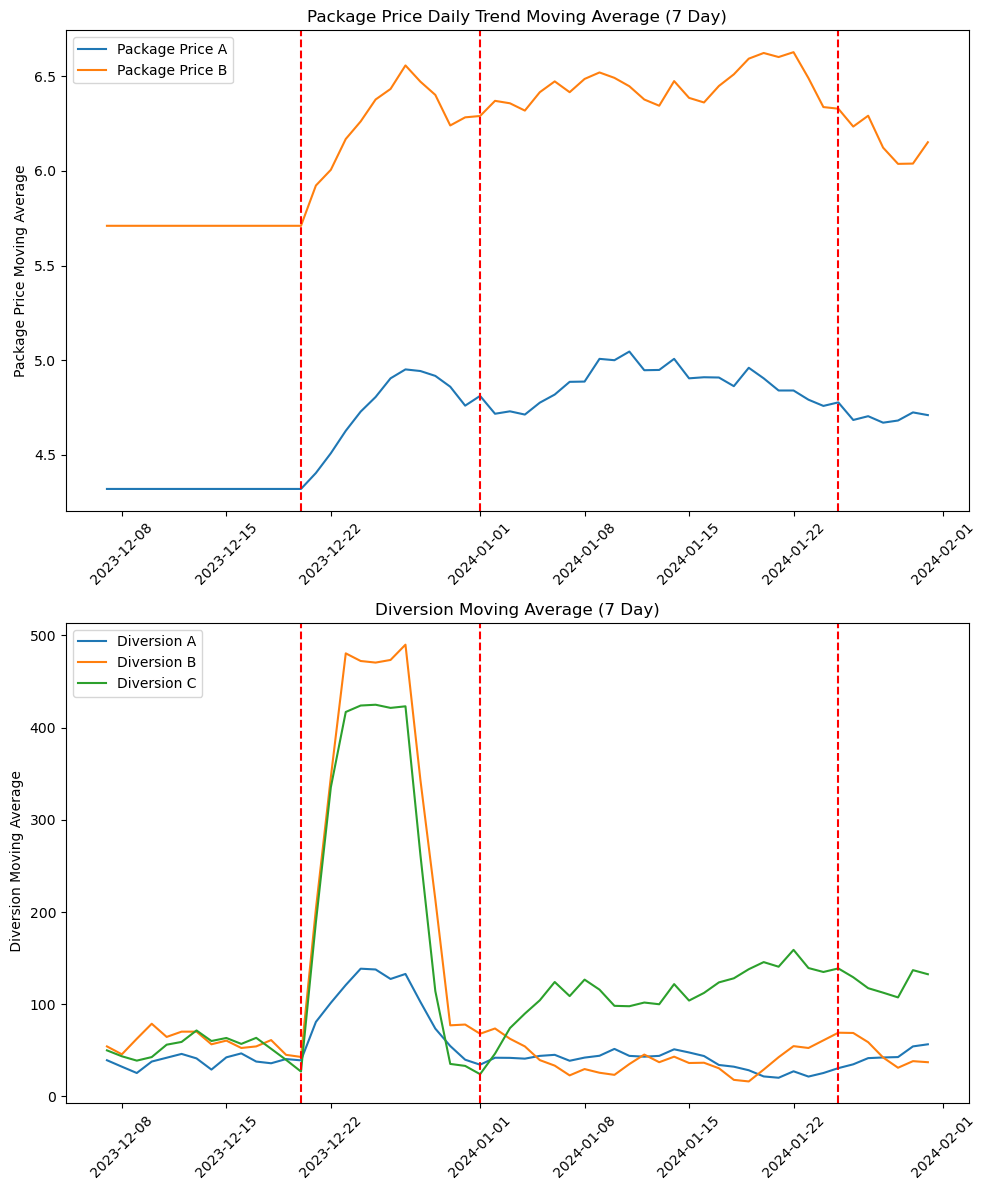

In [55]:
package_price['date'] = pd.to_datetime(package_price['date'])
load_dist['date'] = pd.to_datetime(load_dist['date'])


red_line_date1 = pd.to_datetime("12/20/2023")
red_line_date2 = pd.to_datetime("01/01/2024")
red_line_date3 = pd.to_datetime("01/25/2024")

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Package Price Trends
axs[0].plot(package_price['date'], package_price['px_matA_A_Movingavg'], label='Package Price A')
axs[0].plot(package_price['date'], package_price['px_matA_B_Movingavg'], label='Package Price B')
axs[0].set_title("Package Price Daily Trend Moving Average (7 Day)")
axs[0].set_ylabel('Package Price Moving Average')
axs[0].legend()
axs[0].axvline(x=red_line_date1, color='red', linestyle='--')  
axs[0].axvline(x=red_line_date2, color='red', linestyle='--') 
axs[0].axvline(x=red_line_date3, color='red', linestyle='--') 

axs[0].tick_params(axis='x', rotation=45)

# Diversion Trends
axs[1].plot(load_dist['date'], load_dist['diversion_A_Movingavg'], label='Diversion A')
axs[1].plot(load_dist['date'], load_dist['diversion_B_Movingavg'], label='Diversion B')
axs[1].plot(load_dist['date'], load_dist['diversion_C_Movingavg'], label='Diversion C')
axs[1].set_title("Diversion Moving Average (7 Day)")
axs[1].set_ylabel(' Diversion Moving Average')
axs[1].legend()
axs[1].axvline(x=red_line_date1, color='red', linestyle='--')  
axs[1].axvline(x=red_line_date2, color='red', linestyle='--')  
axs[1].axvline(x=red_line_date3, color='red', linestyle='--') 
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 2. What other factors might be explaining the diversion of humanitarian supplies?

Conclusion : 
1. Price of the product is not much likely to have decisive impact in diversion

- The amount of price increase in three supplies not matching amount of diversion
    + The diversion of supply C is the largest, however the increase in price of supply C is not notable
    + Supply A, which showed larges jump in price (80%) did not show much jump in diversion
    
2. The rainfall is an important underlying factor that have impact over diversion

- The jump in rainfall and drastic drop in temperature matches with the drastic increase of diversion during the end of 2023 December.
- The weather cannot be controlled by other factors, making it a potential deciding factor in price, quantity, or diversion

Assumption :    
Method :    

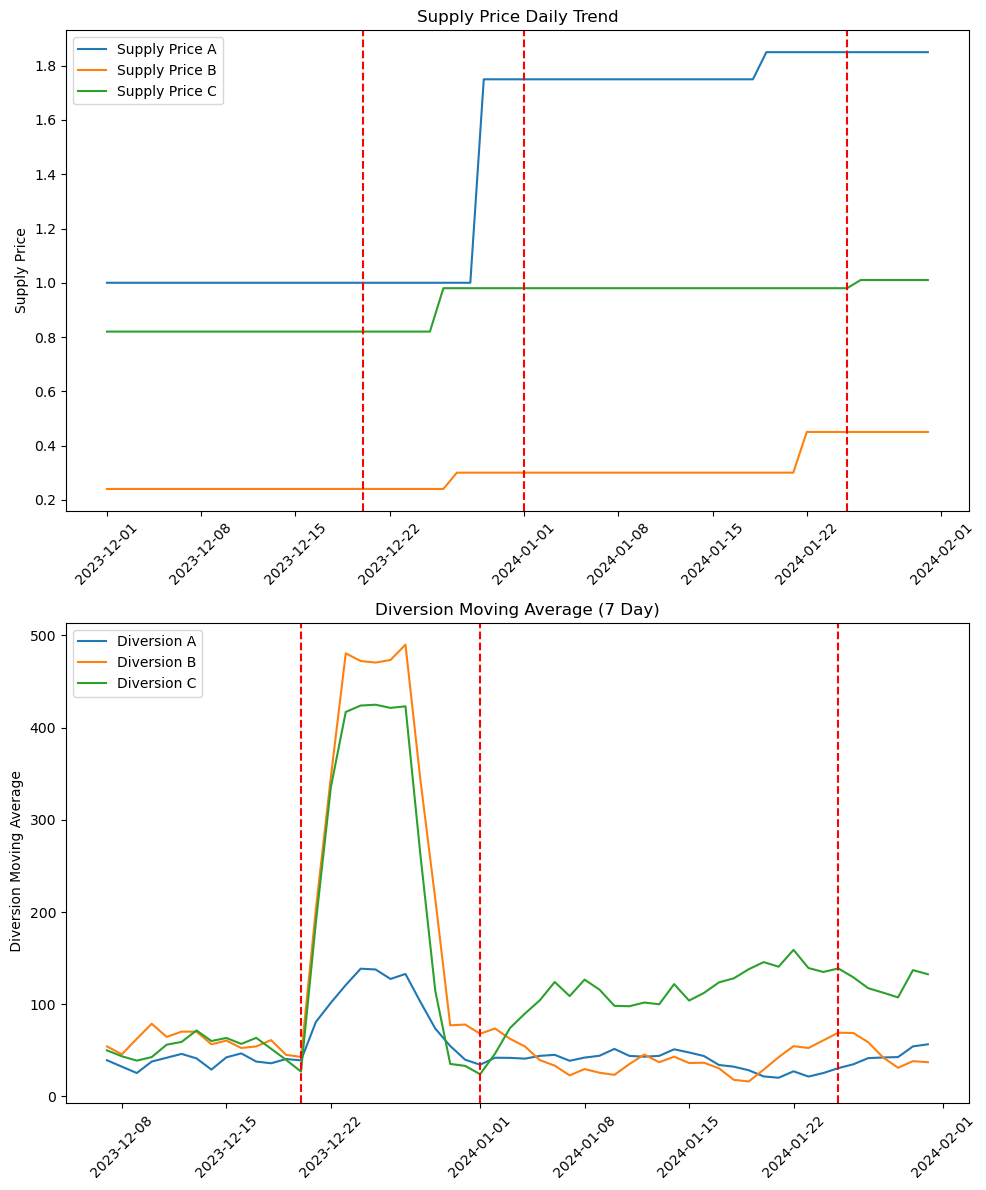

In [79]:
#Other two factos : price of the product & weather can also have impact on diversion
#of humanitarian supplies


##1. Price of products (Supplies)
package_price['date'] = pd.to_datetime(package_price['date'])
load_dist['date'] = pd.to_datetime(load_dist['date'])


red_line_date1 = pd.to_datetime("12/20/2023")
red_line_date2 = pd.to_datetime("01/01/2024")
red_line_date3 = pd.to_datetime("01/25/2024")

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Supply Price Trends
axs[0].plot(supply_price['date'], supply_price['px_hsA'], label='Supply Price A')
axs[0].plot(supply_price['date'], supply_price['px_hsB'], label='Supply Price B')
axs[0].plot(supply_price['date'], supply_price['px_hsC'], label='Supply Price C')

axs[0].set_title("Supply Price Daily Trend")
axs[0].set_ylabel('Supply Price')
axs[0].legend()
axs[0].axvline(x=red_line_date1, color='red', linestyle='--')  
axs[0].axvline(x=red_line_date2, color='red', linestyle='--') 
axs[0].axvline(x=red_line_date3, color='red', linestyle='--') 

axs[0].tick_params(axis='x', rotation=45)

# Diversion Trends
axs[1].plot(load_dist['date'], load_dist['diversion_A_Movingavg'], label='Diversion A')
axs[1].plot(load_dist['date'], load_dist['diversion_B_Movingavg'], label='Diversion B')
axs[1].plot(load_dist['date'], load_dist['diversion_C_Movingavg'], label='Diversion C')
axs[1].set_title("Diversion Moving Average (7 Day)")
axs[1].set_ylabel(' Diversion Moving Average')
axs[1].legend()
axs[1].axvline(x=red_line_date1, color='red', linestyle='--')  
axs[1].axvline(x=red_line_date2, color='red', linestyle='--')  
axs[1].axvline(x=red_line_date3, color='red', linestyle='--') 
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

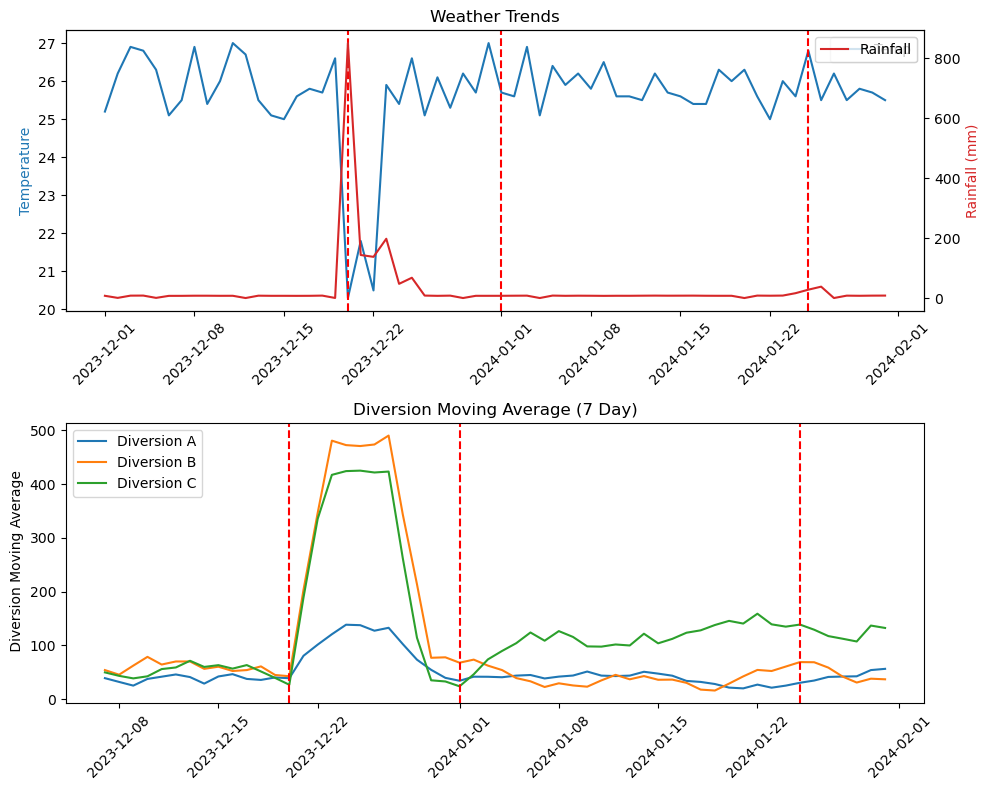

In [78]:

##2. Weather
package_price['date'] = pd.to_datetime(package_price['date'])
load_dist['date'] = pd.to_datetime(load_dist['date'])


red_line_date1 = pd.to_datetime("12/20/2023")
red_line_date2 = pd.to_datetime("01/01/2024")
red_line_date3 = pd.to_datetime("01/25/2024")

fig, axs = plt.subplots(2, 1, figsize=(10, 8)) # Example with 2 subplots

axs[0].plot(weather['date'], weather['temp'], label='Temp', color='tab:blue')
axs[0].set_ylabel('Temperature', color='tab:blue')


ax2 = axs[0].twinx()
ax2.plot(weather['date'], weather['rainfall'], label='Rainfall', color='tab:red')
ax2.set_ylabel('Rainfall (mm)', color='tab:red')

axs[0].set_title("Weather Trends")
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')

axs[0].legend()
axs[0].axvline(x=red_line_date1, color='red', linestyle='--')  
axs[0].axvline(x=red_line_date2, color='red', linestyle='--') 
axs[0].axvline(x=red_line_date3, color='red', linestyle='--') 

axs[0].tick_params(axis='x', rotation=45)




# Diversion Trends
axs[1].plot(load_dist['date'], load_dist['diversion_A_Movingavg'], label='Diversion A')
axs[1].plot(load_dist['date'], load_dist['diversion_B_Movingavg'], label='Diversion B')
axs[1].plot(load_dist['date'], load_dist['diversion_C_Movingavg'], label='Diversion C')
axs[1].set_title("Diversion Moving Average (7 Day)")
axs[1].set_ylabel(' Diversion Moving Average')
axs[1].legend()
axs[1].axvline(x=red_line_date1, color='red', linestyle='--')  
axs[1].axvline(x=red_line_date2, color='red', linestyle='--')  
axs[1].axvline(x=red_line_date3, color='red', linestyle='--') 
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



## 3. What else should the Country Office think about to understand the situation (for example, any reason to suspect the data quality)?

#### 1. The data quality issue

- Suspicouse static trend in package price A,B in before 12/20/2023
    + While the price has its natural quality to have a noise, the price data is too straight, with the same value being repeated for around three weeks
    + This can be suspected as a data error
- Impact on weather on data quality : 
    + As there was a huge rain around 12/20 2023, this can lead to error in data collection as it can has physical influence on the supply chain.
    + Thus, a second look over the data quality is required.


#### 2. The impact of weather and another scenario
- The weather (drastic increase in rainfall) can have a lasting impact on many different factors including
    + Price of the packaging material
    + Efficiency of supply chain
- Thus, country office should try to understand what happened due to the heavy rain fall during the end of December 2023.


#### 3. The diversion trend is most visible in supply C in 2024
- As discussed in the probelm definition part, the diversion trend is more conspicuous in supply C.
- Thus, one should dive deeper into what factor specifically had more impact on diversion of C compared to other products. 
- For example, one can consider
    + Whether there was any issue in the supply chain that deals with product C (Data error, data quality, any accident in supply chain, any inefficiency in supply chain, any security issue in supply chain of C)
    + Whether there was any packaging material that was more used for product A compared to other
        - If certain packaging material was more used of supply C, we should look closely into the price of the material, especially the price in the black market
    + If the packaging material price for A is accurate (If there was any unseen increase in price)
    + Whether there was any change in the price of product A different from the reality
